# k-means clustering

####### For K=2 #######
The final value for the 0-th prototype is [9.96228854e+01 4.09186319e+00 1.00928973e+03 2.24053712e+00
 2.28482015e+00 9.35405655e+06]
The final value for the 1-th prototype is [9.86231767e+01 4.32589304e+00 1.91255400e+03 2.08697989e+00
 2.16321078e+00 2.51644978e+05]



####### For K=3 #######
The final value for the 0-th prototype is [9.87500000e+01 3.60702381e+00 3.93654944e+02 3.03576996e+00
 3.04510035e+00 8.00088245e+06]
The final value for the 1-th prototype is [9.86231767e+01 4.32589304e+00 1.91255400e+03 2.08697989e+00
 2.16321078e+00 2.51644978e+05]
The final value for the 2-th prototype is [9.96639623e+01 4.11467916e+00 1.03826077e+03 2.20311440e+00
 2.24904226e+00 9.41773533e+06]



####### For K=4 #######
The final value for the 0-th prototype is [9.83846947e+01 3.90678780e+00 1.90892796e+03 2.11140731e+00
 2.18377099e+00 1.22928412e+05]
The final value for the 1-th prototype is [9.87500000e+01 3.60702381e+00 3.93654944e+02 3.03576996e+00
 3.045100

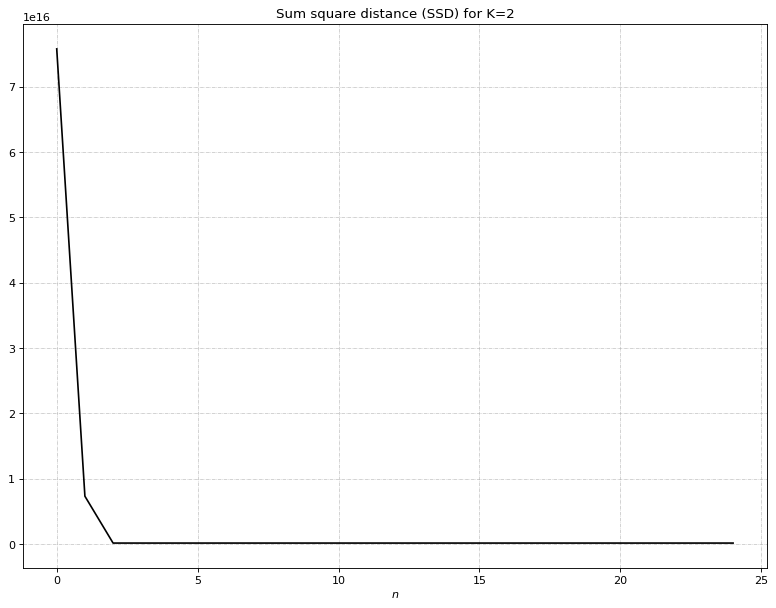

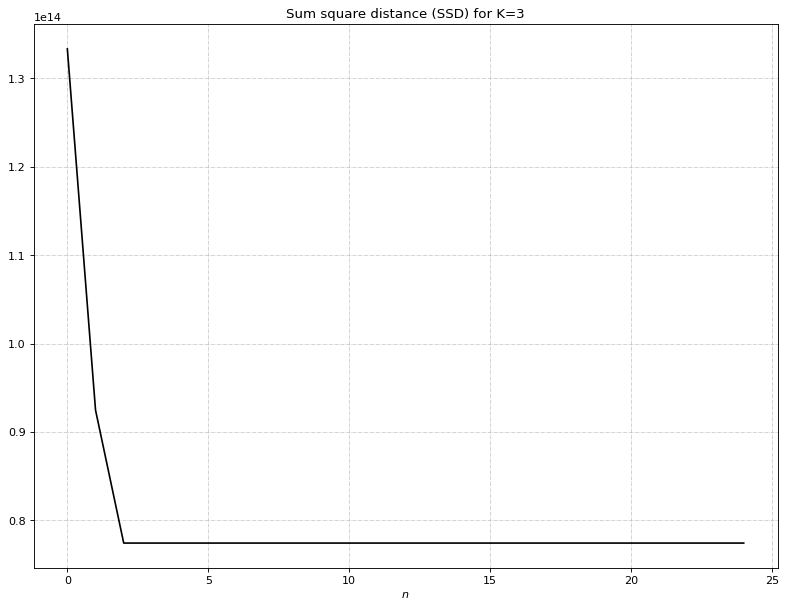

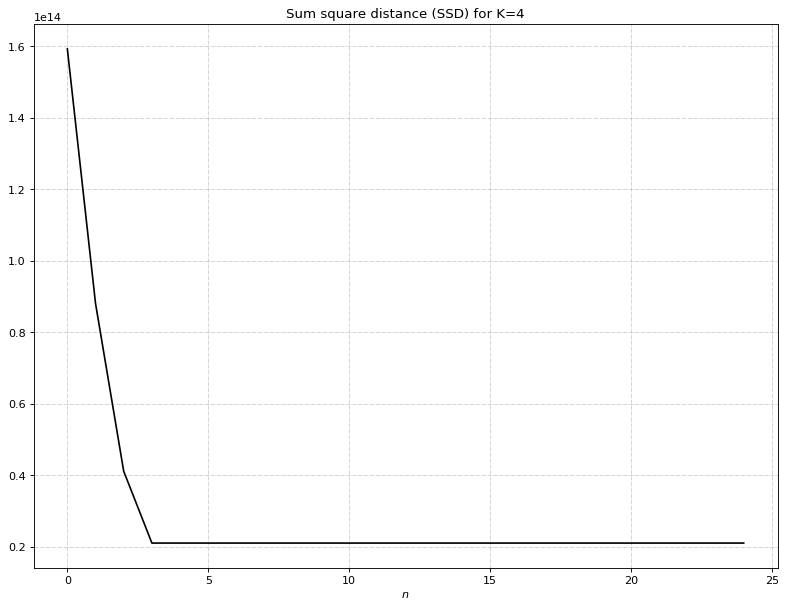

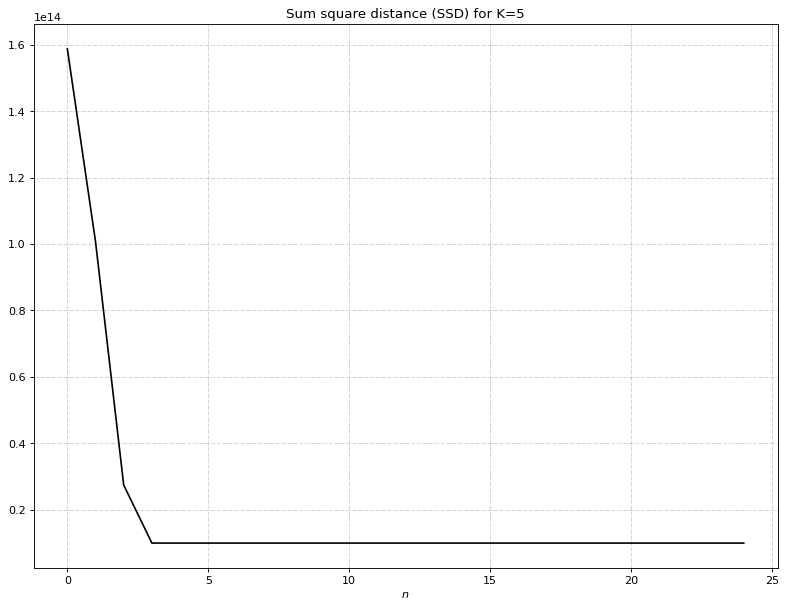

In [16]:
from numpy import genfromtxt, empty, array, argmin, amin, mean, arange
from numpy.linalg import norm
from numpy.random import permutation
import matplotlib.pyplot as plt

X = genfromtxt('./data/datasetTC3.dat', dtype=float, delimiter='\t').T

all_K = range(2,7)
p, N = X.shape
# number of iterations
N_iter = 10
# sum square distance (SSD)
SSD = empty(N_iter)
# set of all partitions
V = {}

all_K = range(2,6)
for K in all_K:
    i = permutation(N)
    # initialize W with k random instances
    W = X[:, i[:K]]
    # the minimum distance for the n-th vector and its index
    min_dist, min_disti = empty(N), empty(N, dtype=int)
    for n_iter in range(N_iter):
        # for each instance vector x
        for n in range(N):
            # all distancies from all vectors to the k-th prototype
            dist2w = array([norm(X[:,n] - W[:,k]) for k in range(K)])
            # index of the closest prototype, w, to the n-th vector
            min_dist[n], min_disti[n] = amin(dist2w), argmin(dist2w)

        # sum up all 
        SSD[n_iter] = sum(min_dist**2)

        # partition into K sets
        for k in range(K):
            # get all all instances that have the minimum distance to the k-th prototype
            V[k] = X[:, min_disti==k]
            # update the prototype
            if V[k].shape[1] == 1:
                W[:,k] = mean(V[k])
            else:
                W[:,k] = mean(V[k], axis=1)

        for n in range(N):
            # all distancies from all vectors to the k-th prototype
            dist2w = array([norm(X[:,n] - W[:,k]) for k in range(K)])
            # index of the closest prototype, w, to the n-th vector
            min_dist[n], min_disti[n] = amin(dist2w), argmin(dist2w)

        
    fig = plt.figure(figsize=(12, 9), dpi=80)
    ax = fig.gca()
    ax.set_axisbelow(True)
    ax.plot(SSD, 'k')
    ax.grid(True, linestyle='-.', linewidth=.5)
    plt.xlabel(r'$n$')
    plt.title(f'Sum square distance (SSD) for K={K}')
    print(f'####### For K={K} #######')
    for k in range(K):
        print(f'The final value for the {k}-th prototype is {W[:,k]}')
    print('\n\n')
plt.show()